## 2-1

# (a)

### Tick

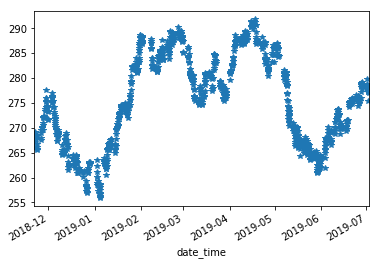

In [382]:
tb.price.plot(marker='*',ls='',label='tick bar')

### Volume

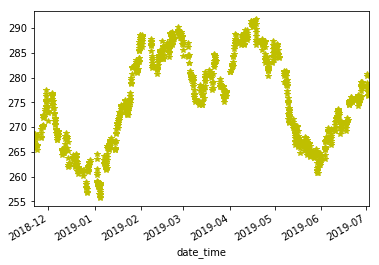

In [385]:
vb.price.plot(marker='*',ls='',c='y')

### Dollar

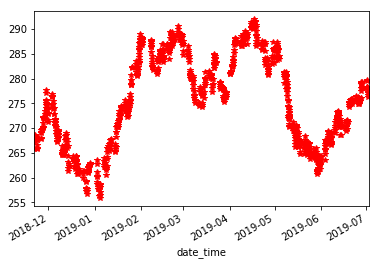

In [390]:
db.price.plot(marker='*',ls='',c='r')

## (b) count the number of bars produced by tick, volume, and dollar bars on a weekly basis. Plot a time series of that bar count. What bar type produces the most stable weekly count? Why?

### size 1000 근방

7.765136733171444 7.338926930066035 7.287650409072082


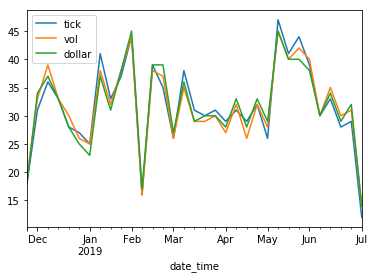

In [395]:
fig, ax = plt.subplots(1)
weekly_tick_count.dropna().plot(ax=ax)
weekly_vol_count.dropna().plot(ax=ax)
weekly_dollar_count.dropna().plot(ax=ax)
ax.legend(["tick", "vol", 'dollar'])

print(weekly_tick_count.dropna().std(),
weekly_vol_count.dropna().std(),
weekly_dollar_count.dropna().std())

## std : tick > vol > dollar

### size 4551 고정

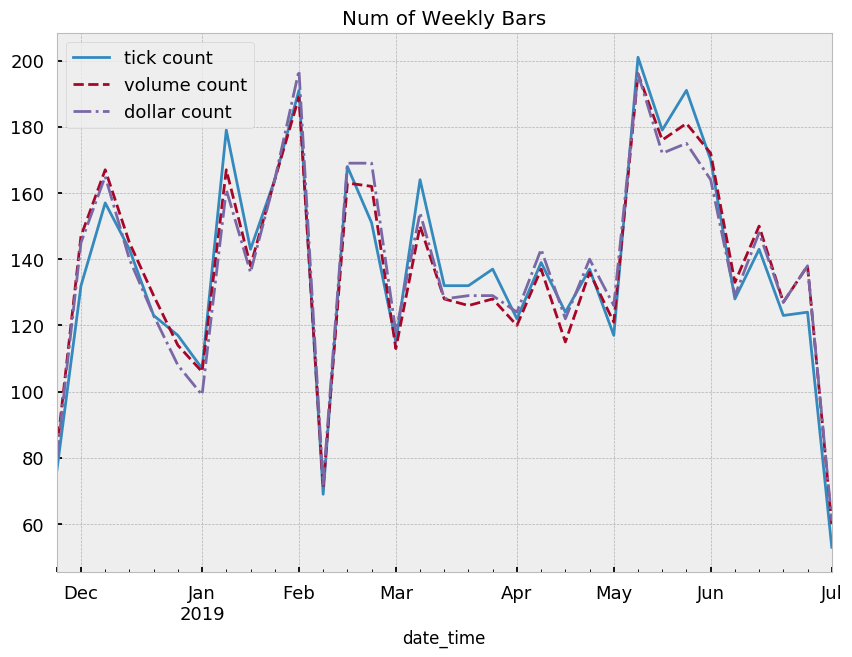

In [22]:
fig, ax = plt.subplots(1)
weekly_tick_count.dropna().plot(ax=ax)
weekly_vol_count.dropna().plot(ax=ax)
weekly_dollar_count.dropna().plot(ax=ax)
ax.legend(["tick", "vol", 'dollar'])

print(weekly_tick_count.dropna().std(),
weekly_vol_count.dropna().std(),
weekly_dollar_count.dropna().std())f,ax=plt.subplots(figsize=(10,7))

t_count.plot(ax=ax, ls='-', label='tick count')
v_count.plot(ax=ax, ls='--', label='volume count')
d_count.plot(ax=ax, ls='-.', label='dollar count')

ax.set_title('Num of Weekly Bars')
ax.legend()

In [44]:
display(temp_tick.index.size)
display(temp_volume.index.size)
display(temp_dollar.index.size)

temp_tick = pd.read_csv('tick_t3500_d30.csv',index_col='timestamp')
temp_volume = pd.read_csv('volume_t20000_d30.csv',index_col='timestamp')
temp_dollar = pd.read_csv('dollar_t5300000_d30.csv',index_col='timestamp')

temp_tick['return'] = temp_tick['close'].pct_change()
temp_volume['return'] = temp_volume['close'].pct_change()
temp_dollar['return'] = temp_dollar['close'].pct_change()

temp_tick = temp_tick.dropna()
temp_volume = temp_volume.dropna()
temp_dollar = temp_dollar.dropna()

display(np.std(temp_tick['return']))
display(np.std(temp_volume['return']))
display(np.std(temp_dollar['return']))

1495

1526

1585

0.002731362985818454

0.002676956326507148

0.002670536372875379

거의 차이가 안나지만 dollar bar의 std가 낮다

결론 : dollar bar가  stable (stable을 Standard deviation 이 낮다로 판단)

+ bar의 수가 클수록 std가 낮아지는 데, bar 종류별로 bar 숫자를 맞춰서 std를 비교하였다.

Q. bar의 숫자를 맞춰서 비교하는 것이 어떤 역할을 하는가?  
+ 통계적 성질을 비교하기 쉽게해준다. 
+ 각 bar 에서 동일한 수량의 정보를 가져와서 정보의 정도를 비교

## (c) Compute the serial correlation of returns for the three bar types. What bar method has the lowest serial correlation?

type|threshold|size|autocorr
---|---|---|---
tick|1,000|696|-0.01
tick|1,500|430|0.02
tick|2,000|343|-0.02
tick|10,000|134|-0.04
tick|20,000|62|-0.008
volume|5,000|863|0.001
volume|10,000|429|0.02
volume|20,000|207|-0.08
volume|40,000|98|0.08
volume|60,000|63|-0.03
dollar|500,000|2267|-0.02
dollar|1,000,000|1161|-0.005
dollar|2,000,000|577|0.04
dollar|4,000,000|281|-0.03
dollar|6,000,000|186|-0.02

type|threshold|size|autocorr
---|---|---|---
tick|1,000|696|-0.01027964875388183
volume|5,000|863|0.0011095931056040364
dollar|2,000,000|577|0.036984768684528824

###  size 가 클 수록 낮은 autocorr을 보인다.

In [29]:
autocorrs = get_test_stats(bar_types,bar_returns,pd.Series.autocorr)
display(autocorrs.sort_values('autocorr_stat'),
        autocorrs.abs().sort_values('autocorr_stat'))

,sample_size,autocorr_stat
df_raw,5256742.0,-0.314554
dollar,4550.0,-0.007240
tick,4550.0,-0.000223
volume,4550.0,0.001190


,sample_size,autocorr_stat
tick,4550.0,0.000223
volume,4550.0,0.001190
dollar,4550.0,0.007240
df_raw,5256742.0,0.314554


### size를 맞췄을 때, tick이 가장 낮은 autocorr을 보임 - 1

size of tick 192
size of volume 207
size of dollar 211


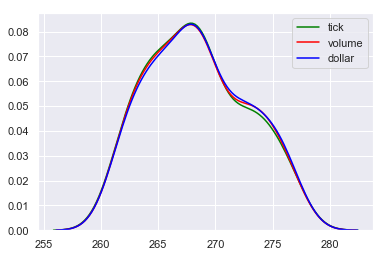

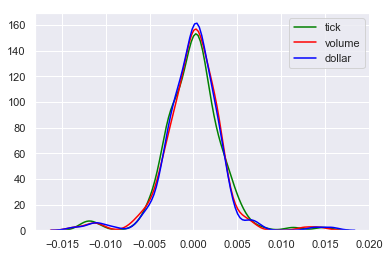

-0.012984681968585701

-0.08347302108554866

-0.11257913902427771

In [7]:
 bar_seq(daily,3500,20000,5300000)

### size를 맞췄을 때, tick bar 가 가장 낮은 autocorr을 보임 - 2

autocorr 이 낮다는 것의 의미는? 
+ 남들이 모르는 정보를 얻을 수 있는 가능성이 높다. 
+ 자기상관도가 높다는거는 public info 가 너무 많아서 깨끗한 정보를 얻기 어렵다.
+ autocorr이 낮아야 통계적으로 좋은 정보

자기상관도가 낮을수록 예측할 때 더 좋음.  
+ 통계학적으로도 unbiased 는 얻을 수 있지만 분산이 높아서 inefficient

VS. 

Information driven bar 이므로 time domain에서의 autocorr과는 해석을 달리해야하지 않을까?  

+ https://www.investopedia.com/terms/a/autocorrelation.asp
+ https://www.investopedia.com/terms/s/serial-correlation.asp

ex) 어떤 상품의 가격이 높은 autocorr 지니고 있는데 현재 상승추세이다. 계속 상승할 가능성이 아닐 가능성보다 크다고 할 수 있지 않을까?

정보나 사건의 발생량을 단위로 샘플링을 하니까. 이전의 사건의 영향이 미래에 미치닌 정도를 표현한다고 볼 수 있지 않을까?


## (d) Partition the bar series into monthly subsets. Compute the variance of returns for every subset of evert bar type. Compute the variance of those variances. What method exhibits the smallest variance of variances?

In [30]:
display(list_var)

tick_var=[]
volume_var=[]
dollar_var=[]
for i in list_var:
    tick_var.append(i[0])
    volume_var.append(i[1])
    dollar_var.append(i[2])
    
tick_varvar = np.var(tick_var)
volume_varvar = np.var(volume_var)
dollar_varvar= np.var(dollar_var)

display(tick_varvar)
display(volume_varvar)
display(dollar_varvar)

[[8.104825352395243e-06, 6.109450767545803e-06, 6.711668602123539e-06],
 [9.871254328271289e-06, 1.0040492385521104e-05, 1.055165194931652e-05],
 [6.284438967754881e-06, 6.570345407339116e-06, 6.101340779508397e-06],
 [6.185833778688405e-06, 5.720799653468178e-06, 4.985283621103247e-06],
 [7.653480310986125e-06, 7.414514210434003e-06, 7.719949513905903e-06],
 [5.003557023965887e-06, 4.242073271549313e-06, 4.414483401157231e-06],
 [7.68002319605474e-06, 7.860018571124206e-06, 7.819664965535925e-06],
 [6.344910373501795e-06, 5.602726322006085e-06, 5.616807857099982e-06],
 [1.0101968262744611e-05, 6.7801771655493584e-06, 7.928329891342995e-06]]

2.619762526439006e-12

2.3990126246512785e-12

3.118552672498244e-12

### Variance of Variances : Dollar > Tick > Volume  

Dollar Bar의 분산들의 분산이 크다.


##  (e) Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistics?

the Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.

size 1000 근방

In [405]:
s = '\n'
print("jarque bera statistics : ", s,"time bar: ",jtime,s, "tick bar: ", jt,s,"volume bar: " ,jv,s,"dollar bar: " , jd)

jarque bera statistics :  
 time bar:  1306.7836832649127 
 tick bar:  296.2614583137286 
 volume bar:  440.5849195231698 
 dollar bar:  332.9022801952187


### time  > volume > dollar > tick - 1

type|threshold|size|autocorr
---|---|---|---
tick|1,000|696|-0.01
volume|5,000|863|0.001
dollar|2,000,000|577|0.04

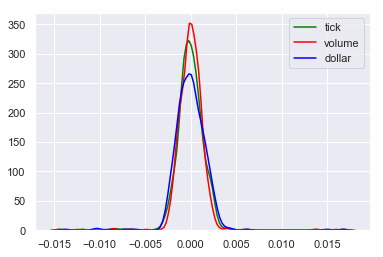

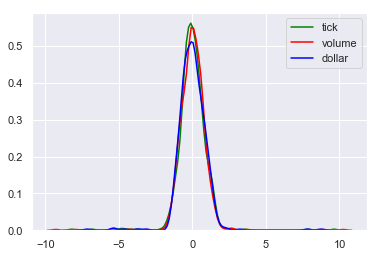

In [36]:
temp_tick = pd.read_csv('tick_t1000_d30.csv',index_col='timestamp')
temp_volume = pd.read_csv('volume_t5000_d30.csv',index_col='timestamp')
temp_dollar = pd.read_csv('dollar_t2000000_d30.csv',index_col='timestamp')

temp_tick['return'] = temp_tick['close'].pct_change()
temp_volume['return'] = temp_volume['close'].pct_change()
temp_dollar['return'] = temp_dollar['close'].pct_change()

temp_tick = temp_tick.dropna()
temp_volume = temp_volume.dropna()
temp_dollar = temp_dollar.dropna()

fig, ax = plt.subplots()
sns.kdeplot(temp_tick['return'], color="green", label='tick')
sns.kdeplot(temp_volume['return'],  color="red", label='volume')
sns.kdeplot(temp_dollar['return'], color="blue", label='dollar')
plt.show()

fig, ax = plt.subplots()
temp_tick['norm'] = (temp_tick['return']-np.mean(temp_tick['return']))/np.std(temp_tick['return'])
temp_volume['norm'] = (temp_volume['return']-np.mean(temp_volume['return']))/np.std(temp_volume['return'])
temp_dollar['norm'] =(temp_dollar['return']-np.mean(temp_dollar['return']))/np.std(temp_dollar['return'])

sns.kdeplot(temp_tick['norm'], color="green", label='tick')
sns.kdeplot(temp_volume['norm'],  color="red", label='volume')
sns.kdeplot(temp_dollar['norm'], color="blue", label='dollar')
plt.show()

In [34]:
from scipy.stats import jarque_bera


jb_value_tick, _ = jarque_bera(temp_tick['return'])
jb_value_vol, _ = jarque_bera(temp_volume['return'])
jb_value_dollar, _ = jarque_bera(temp_dollar['return'])

jb_test_df = pd.DataFrame(data={'jarque_bera_results' : [jb_value_tick,  
                                                         jb_value_vol,
                                                         jb_value_dollar]
                               },
                          index=['tick', 'vol', 'dollar'])
jb_test_df

,jarque_bera_results
tick,22369.407159
vol,41928.631421
dollar,12760.358808


### volume  > tick > dollar  - 2

In [34]:
s = '\n'
print("jarque bera statistics : ", s,"time bar: ",jtime,s, "tick bar: ", jt,s,"volume bar: " ,jv,s,"dollar bar: " , jd)from scipy.stats import jarque_bera


jb_value_tick, _ = jarque_bera(temp_tick['return'])
jb_value_vol, _ = jarque_bera(temp_volume['return'])
jb_value_dollar, _ = jarque_bera(temp_dollar['return'])

jb_test_df = pd.DataFrame(data={'jarque_bera_results' : [jb_value_tick,  
                                                         jb_value_vol,
                                                         jb_value_dollar]
                               },
                          index=['tick', 'vol', 'dollar'])
jb_test_dfdef jb(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.jarque_bera(x)[0]
    return stats.jarque_bera(x)[1]

get_test_stats(bar_types,bar_returns,jb).sort_values('jb_stat')

,sample_size,jb_stat
dollar,4550.0,3.670098e+04
volume,4550.0,3.891609e+04
tick,4550.0,4.526845e+04
df_raw,5256742.0,1.141607e+12


### 대부분의 지표들이 Tick 아니면 Dollar가 우세하다. 데이터 표본이 작은 것이 원인일 수도 있다.

## 2.2 On series of 'Data', compute dollar bars and dollar imbalance bars. What bar type exhibits greater serial correlation? Why?

In [91]:
re_dib = returns(dib.close)

dollar_get = [re_db, re_dib]
dollar_types = ['volume var', 'v_imbalance']
autocorrs = get_test_stats(dollar_types,dollar_get, pd.Series.autocorr)
display(autocorrs.sort_values('autocorr_stat'),
        autocorrs.abs().sort_values('autocorr_stat'))

,sample_size,autocorr_stat
volume var,4550.0,-0.007240
v_imbalance,75905.0,-0.004979


,sample_size,autocorr_stat
v_imbalance,75905.0,0.004979
volume var,4550.0,0.007240


Imbalance bar의 auto corr이 낮다 - sample_size 차이가 크다는 것을 주의하자

Dollar bar와 dollar imbalance bar의 의미 차이

Dollar bar 는 거래대금이 발생했을 때 샘플링  
Dollar imbalance bar 는 거래대금이 특정방향으로 기대치 이상으로 발생하였을 때 샘플링  


## 2.4 (a) Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the bands to outside the bands)

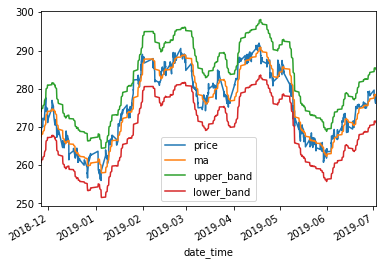

In [432]:
bb.plot()

In [435]:
def getTEvents(gRaw,h):
  tEvents,sPos,sNeg=[],0,0
  
  diff=np.log(gRaw).diff()
  for i in diff.index[1:]:
    sPos,sNeg=max(0,sPos+diff.loc[i]),min(0,sNeg+diff.loc[i])
    if sNeg<-h:
      sNeg=0;tEvents.append(i)
    elif sPos>h:
      sPos=0;tEvents.append(i)
  
  return tEvents

8

In [438]:
len(t_events)

8

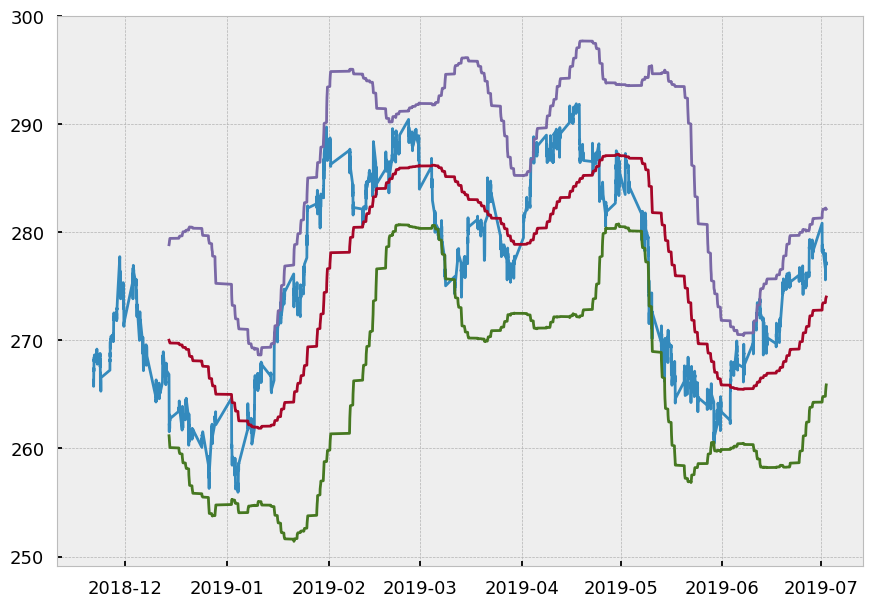

In [95]:
volumevolumeplt.plot(db['price'])
plt.plot(mbb)
plt.plot(ubb)
plt.plot(lbb)
plt.show()


In [96]:
cross_count=0
for i in range(0, len(db['price'])):
  if db['price'][i] - ubb[i] >= 0 and db['price'][i-1] - ubb[i-1] < 0:
    cross_count += 1
  if db['price'][i] - lbb[i] < 0 and db['price'][i-1] - lbb[i-1] >= 0:
    cross_count += 1
cross_count



30

### (c) 

+ 현재 샘플링된 데이터가 너무 적다. 필터의 폭을 좁혀서 해보자.

### Note

Imbalance bar 를 만드는 마지막 식이  

$\text{arg } \text{min} \{  |\theta_t| \geq E_0[T] \mid 2P[b_t = 1] -1 \mid \} $. 인데  

책에서는 'in practice'   $ E_0[T]$ 를 T 의 ewma 로 $2P[b_t = 1] -1$ 를 b 의 ewma로 구한다고 하였다.  

$2P[b_t = 1] -1$ 는 실제값을 구할 수 있는데, 왜 근삿값을 사용한 것일까? 어떤 식으로 근사시키는 것일까?

### mlfinlab 

+ 이전 tick의 정보를 다 named_tuple에 담아둠
+ abc 인 BaseBar 로 standard와 imbalance, run 의 공통 & 필수인 요소를 정의하고 제약
+ $E_0[T]$ 와 $P[b_t=1]$ 을 EWMA로 구하기 때문에 window 크기만큼의 이전 bar의 데이터를 가지고 있어야한다 
    * $E_0[T]$ : ```self.num_ticks_bar = []```
    * $P[b_t=1]$ : ```self.imbalance_array = []```